# 3 Introduction to Summary Statistics


***
# 3.4 Covariance and Pearson Correlation Coefficient
---

We have more data than just the vote share for Obama. 

We also know the total number of votes in each county.

Let's see at how these two quantities vary together. We start by looking at a **scatter plot** of the county data for the three swing states, plotting the percent vote for Obama versus the total number of votes in each county.


<img src="img/scatter_plot_ex1.png",width=500>


Immediately from the scatter plot, we see that the twelve most populous counties all voted for Obama, and that most of the counties with small populations voted for McCain.

### EDA: Scatter Plot ```plt.plot()```
To generate a scatter plot, we plot the data as points by

```python
_ = plt.plot(total_votes/1000, dem_share, marker=".", linestyle="none")
_ = plt.xlabel('total votes (thousands)')
_ = plt.ylabel('percent of vote for Obama')
plt.show()

```

So, we have exposed another graphical EDA technique: scatter plots!

### Covariance

We would like to have a summary statistic to go along with the information we have just gleaned from the scatter plot. 

We want a number that summarizes how Obama's vote share varies with the total vote count. One such statistic is the covariance. 

To understand where it comes from let's annotate the scatter plot with the means of the two quantites we are interested in. Now let's look at the data point from *Lucas County* (the light point on the plot). 


<img src="img/covariance_step1.png",width=500>

This data point differs from the mean vote share for Obama, and the mean total votes

<img src="img/covariance_step2.png",width=500>

We can compute these differences for each data point. **The covariance is the mean of hte product of these differences.**

$$cov(x,y) = \frac{1}{n} \sum_{i=1}^{n} \left( x_{i} -\overline{x} \right) \left( y_{i} -\overline{y} \right) $$

##### Positively correlated
If **x** and **y** both tend to be above, or both below their respective means together, as they are in this data set, then the covariance is positive.

This means that they are positively correlated: when *x* is high so is *y*; when the county is populous, it has more votes for Obama.

###### Examples: 
> - The more time you spend running on a treadmill, the more calories you will burn.
> - The more hours you spend in direct sunlight, the more severe your sunburn.
> - As the temperature goes up, ice cream sales also go up.
> - The more it rains, the more sales for umbrellas go up.
> - As you drink more coffee, the number of hours you stay awake increases
> - The more gasoline you put in your car, the farther it can go
> - ...

##### Negatively correlated
Conversely, if *x* is high when *y* is low, the covariance is negative and the data are negatively correlated, or anticorrelated, which is not the case for this data set. 

###### Examples:
> - The older a man gets, the less hair that he has.
> - The more one works, the less free time one has.
> - If it is darker outside, more light is needed inside.
> - If a chicken increases in age, the amount of eggs it produces decreases.
> - As the temperature decreases, more heaters are purchased.
> - The more one runs, the less likely one is to have cardiovascular problems.
> - The more iron an anemic person consumes, the less tired one may be.
> - ....

#### ```np.cov()``` with NumPy
We can compute the covariance using built-in NumPy functions. The covariance may be computed using the Numpy function ```np.cov()```. 

For example, we have two sets of data _x_ and _y_, ```np.cov(x, y)``` returns a **2D array** where entries 
* ```[0,1]``` and ```[1,0]``` are the covariances. 
* entry ```[0,0]``` is the variance of the data in ```x```, and 
* entry ```[1,1]``` is the variance of the data in y. 

**This 2D output array is called the covariance matrix, since it organizes the self- and covariance.**



### Determining Correlation Strength: Pearson Correlation Coefficient
If we want to have a more generally applicable measure of how two variables depend oon each other, we want it to be dimensionless, that is to **not have any units**. 

So, we can divide the covariance by the standard deviations of the **x** and **y** variables. This is called the **Pearson correlation coefficient**, usually denoted by the greek letter $\rho$. 


$$ \frac{\rm{variability-to-codependence}}{\rm{independent-variability}}$$

$$ r_{xy} = \frac{ \sum_{i=1}^{n} \left( x_{i} -\overline{x} \right) \left( y_{i} -\overline{y} \right)}{ \sqrt{ \sum_{i=1}^{n}\left( x_{i} -\overline{x} \right)^{2}} \sqrt{ \sum_{i=1}^{n}\left( y_{i} -\overline{y} \right)}^{2} } = \frac{ C_{x,y}} {C_{x,x} C_{y,y}}$$


It is a comparison of the variability in the data due to codependence (i.e. the covariance) to the variability inherent to each variable independently (their standard deviation).

> - a value of -1 means that there is a perfect negative relationship between the variables 
> - a value of 1 indicates that there is a perfect positive relationship
> - A correlation of 0 means there is no relationship between the two variables

Perfect relationships rarely exist in real-life. If you find two things that are negatively correlated, the correlation will almost always be somewhere between 0 and -1. The closer a negative correlation is to -1, the stronger the relationship between the two variables. The same for a postive correlation. 


<img src="img/corr_examples.png",width=500>

As you can see, the Pearson correlation coefficient is a good metric for correlation between two variables.

---
# Let's practice!
***

<div class="alert alert-block alert-success">
<b>Loading data.</b> In the following ipython cell, the necessary data set for this section is loaded
</div>

In [111]:
# all packages are already loaded
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

# Loading data in the namespace
# columns info: row,petal length (cm),petal width (cm),sepal length (cm),sepal width (cm),species
iris = np.genfromtxt( "data/iris.csv", delimiter=",", skip_header=1)

# Select features for the versicolor type of iris
# species info: 
#       1 for versicolor
#       0 for setosa
#       2 for virginica
versicolor = iris[:,5]== 1
versicolor_petal_length = iris[versicolor,1]
versicolor_petal_width = iris[versicolor,2]

setosa = iris[:,5]== 0
setosa_petal_length = iris[setosa,1]

virginica = iris[:,5]== 2
virginica_petal_length = iris[virginica,1]

<font color=green>
# Exercise 3.4.1 Scatter plots
</font>
When you made bee swarm plots, box plots, and ECDF plots in previous exercises, you compared the petal lengths of different species of iris. But what if you want to compare two properties of a single species? This is exactly what we will do in this exercise. We will make a scatter plot of the petal length and width measurements of Anderson's Iris versicolor flowers. If the flower scales (that is, it preserves its proportion as it grows), we would expect the length and width to be correlated.

#### Instructions
> - Use ```plt.plot()``` with the appropriate keyword arguments to make a scatter plot of versicolor petal length (x-axis) versus petal width (y-axis). The variables ```versicolor_petal_length``` and ```versicolor_petal_width``` are already in your namespace. Do not forget to use the ```marker='.'``` and ```linestyle='none'``` keyword arguments.
> - Label the axes.
>  -Display the plot.


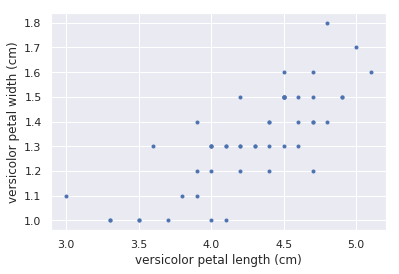

In [75]:
# Make a scatter plot
_ = plt.plot( versicolor_petal_length, versicolor_petal_width, marker=".", linestyle="none")

# Label the axes
_ = plt.xlabel('versicolor petal length (cm)')
_ = plt.ylabel('versicolor petal width (cm)')

# Show the result
plt.show()

<font color=green>
# Exercise 3.4.2 Variance and covariance by looking
</font>
Consider the four scatter plots of _x_-_y_ data

<img src="img/exercise_3_4_2.png",width=500>

Which has, respectively,

> - the **highest variance** in the variable _x_,
> - the **highest covariance**,
> - **negative covariance**?

#### Possible Answers
> - a,c,b
> - d,c,a
> - d,c,b
> - d,d,b



In [106]:
# 

<font color=green>
# Exercise 3.4.3 Computing the covariance
</font>
From first exercise, you know how ```versicolor_petal_length``` and ```versicolor_petal_width``` are related to wach other.

#### Instructions
> - Use ```np.cov()``` to compute the covariance matrix for the petal length (```versicolor_petal_length```) and width (```versicolor_petal_width```) of _versicolor_.
> - Print the **covariance matrix**.
> - Extract the covariance from entry ```[0,1]``` of the covariance matrix. Note that by symmetry, entry ```[1,0]``` is the same as entry ```[0,1]```.
> - Print the covariance.
> - Compute the variance of _x_ and _y_ by using np.var() and compare it with the values ```[0,0]``` and ```[1,1]``` of the covariance matrix


In [107]:
# Compute the covariance matrix: covariance_matrix
covariance_matrix = np.cov( versicolor_petal_length, versicolor_petal_width)

# Print covariance matrix
print "\n\t The covariance matrix is: "
print "\t\t", covariance_matrix[:,0] 
print "\t\t", covariance_matrix[:,1] 
print "\n"

# Extract covariance of length and width of petals: petal_cov
petal_cov = covariance_matrix[0,1]

# Print the length/width covariance
print "\t Covariance is ", petal_cov
print "\n\t Variance of petal length is ", covariance_matrix[0,0]
print "\t  ... now from np.var() ", versicolor_petal_length.var()


	 The covariance matrix is: 
		[ 0.22081633  0.07310204]
		[ 0.07310204  0.03910612]


	 Covariance is  0.0731020408163

	 Variance of petal length is  0.220816326531
	  ... now from np.var()  0.2164


<font color=green>
# Exercise 3.4.4 Computing the Pearson Correlation Coefficient
</font>
As mentioned before, the **Pearson correlation coefficient**, also called the Pearson r, is often easier to interpret than the covariance. It is computed using the ```np.corrcoef()``` function. Like ```np.cov()```, it takes two arrays as arguments and returns a **2D array**. Entries ```[0,0]``` and ```[1,1]``` are necessarily equal to 1 (can you think about why?), and the value we are after is entry [0,1].

In this exercise, you will write a function, pearson_r(x, y) that takes in two arrays and returns the Pearson correlation coefficient. You will then use this function to compute it for the petal lengths and widths of I. versicolor.

Again, we include the scatter plot you generated in a previous exercise to remind you how the petal width and length are related.

In [108]:
def ____(____, ____):
    """Compute Pearson correlation coefficient between two arrays."""
    # Compute correlation matrix: corr_mat


    # Return entry [0,1]
    return corr_mat[0,1]

# Compute Pearson correlation coefficient for I. versicolor: r


# Print the result


SyntaxError: duplicate argument '____' in function definition (<ipython-input-108-cb9496073a53>, line 1)

In [109]:
def pearson_r(x,y):
    """Compute Pearson correlation coefficient between two arrays."""
    # Compute correlation matrix: corr_mat
    corr_mat = np.corrcoef(x,y)

    # Return entry [0,1]
    return corr_mat[0,1]

# Compute Pearson correlation coefficient for I. versicolor: r
r = pearson_r(versicolor_petal_length, versicolor_petal_width)

# Print the result
print "\t Pearson coeff for the length and width: "
print "\t ", r



	 Pearson coeff for the length and width: 
	  0.786668088523


In [110]:
x = versicolor_petal_length
y = versicolor_petal_width

print "\t The correlation coefficient is ", (np.cov(x,y)/np.sqrt(np.cov(x,x)*np.cov(y,y)))[0,1]

	 The correlation coefficient is  0.786668088523
